In [16]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


27


(-1.0, 1.0)

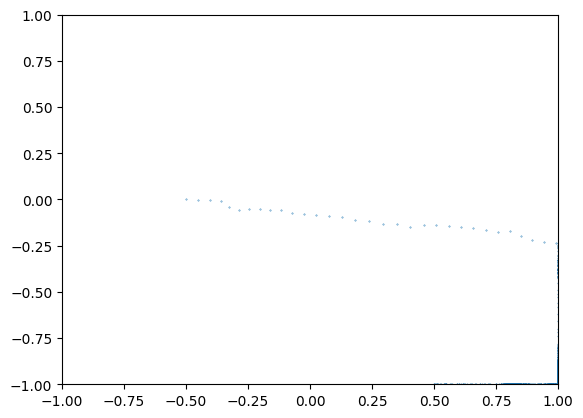

In [33]:
path = './experiments/'
files = os.listdir(path)
# cast list of strings to list of ints
files = [int(file) for file in files if file.isnumeric()]
files.sort()
file = str(files[-1])
print(file)
loading_path = os.path.join(path, file)

train_states = np.load(os.path.join(loading_path, 'train_states.npy'))
plt.scatter(train_states[:,0], train_states[:,1], s=0.1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)

In [34]:
dt = 5e-2
char_size = 1
np.rad2deg(char_size*np.sqrt(dt))

12.811725781509187

In [35]:
from utils.train_utils import *
from environment import ActiveBrownianEnv
# load agent.pth
from utils.utils import *

hparam_path = './hyperparameters.ini'

env_config = hyperparams_dict("Environment", hparam_path)


env = ActiveBrownianEnv(env_config)
train_conv = hyperparams_dict("Training", hparam_path)

agent = torch.load(os.path.join(loading_path, 'agents.pth'))

states = np.array(test_episode(env, agent, train_conv)).squeeze(1)


/var/folders/1w/vzf197w579q7gpjltwgnsprw0000gr/T/ipykernel_1610/1363782672.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  agent = torch.load(os.path.join(loading_path,

(<Figure size 1000x800 with 2 Axes>,
 <Axes: title={'center': 'Mexican Hat Potential (U₀=0.1) with Paths'}, xlabel='x', ylabel='y'>)

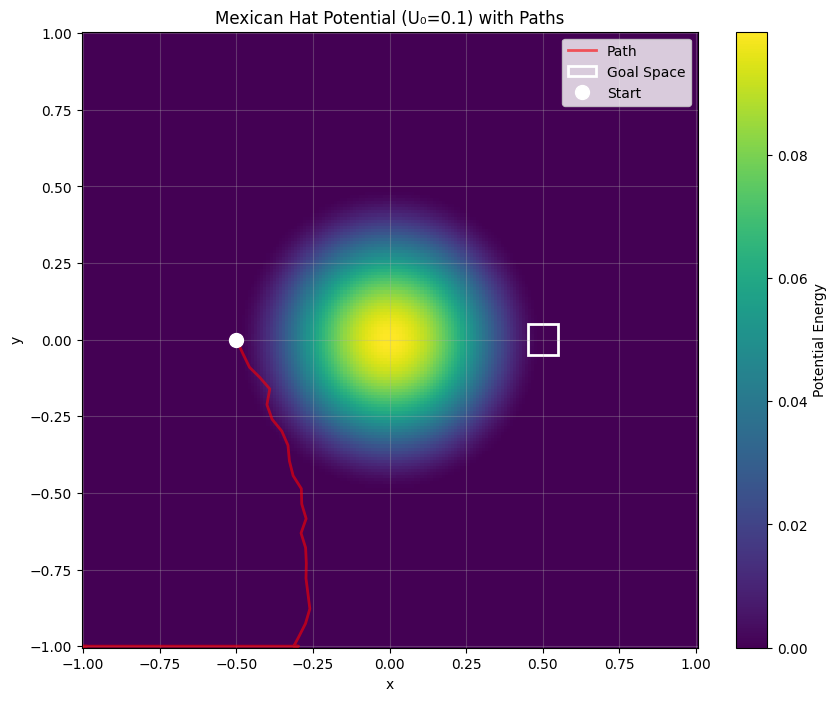

In [36]:
def plot_potential_and_paths(paths=None, U0=0.1, goal_bounds=[0.45, 0.55, -0.05, 0.05]):
    # Create grid for potential
    x = np.linspace(-1, 1, 200)
    y = np.linspace(-1, 1, 200)
    X, Y = np.meshgrid(x, y)
    
    # Calculate radial distance
    rho = np.sqrt(X**2 + Y**2)
    
    # Initialize potential array
    U = np.zeros_like(X)
    
    # Calculate potential for ρ ≤ 1/2
    mask = rho <= 0.5
    U[mask] = 16 * U0 * (rho[mask]**2 - 0.25)**2
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot potential as color map
    im = ax.pcolormesh(X, Y, U, cmap='viridis', shading='auto')
    plt.colorbar(im, label='Potential Energy')
    
    # Plot paths if provided
    if paths is not None:
        if isinstance(paths, list):
            # Multiple paths
            for path in paths:
                ax.plot(path[:, 0], path[:, 1], 'r-', linewidth=2, alpha=0.6, label='Path')
        else:
            # Single path
            ax.plot(paths[:, 0], paths[:, 1], 'r-', linewidth=2, alpha=0.6, label='Path')
    
    # Add goal box if bounds provided
    if goal_bounds is not None:
        # goal_bounds should be [x_min, x_max, y_min, y_max]
        x_min, x_max, y_min, y_max = goal_bounds
        width = x_max - x_min
        height = y_max - y_min
        
        # Create rectangle patch
        goal_box = Rectangle((x_min, y_min), 
                           width, 
                           height,
                           facecolor='none',
                           edgecolor='white',
                           linestyle='-',
                           linewidth=2,
                           label='Goal Space')
        ax.add_patch(goal_box)

    # Add start and end points
    ax.plot(-0.5, 0, 'wo', markersize=10, label='Start')
    
    # Customize plot
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Mexican Hat Potential (U₀={U0}) with Paths')
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    return fig, ax

plot_potential_and_paths(paths=[states])

